In [2]:
#Build a model that takes human images and then classisifes them according to the emotion detected

In [33]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.utils import to_categorical
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
from keras.applications import vgg16

In [4]:
from keras.applications import VGG16

vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [5]:
vgg_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

train_dir = './clean-dataset/train'
validation_dir = './clean-dataset/validation'

nTrain = 1040 
nVal = 

In [6]:
train_dir = 'C:/Users/RAHUL/Downloads/images/train'
validation_dir = 'C:/Users/RAHUL/Downloads/images/test'

nTrain = 1560 #260 x 6
nVal = 180 #30 x 6

In [7]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain,6))
#I HAVE 6 classes now

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nTrain:
        break
        
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))

Found 1560 images belonging to 6 classes.


In [8]:
validation_features = np.zeros(shape=(nVal, 7, 7, 512))
validation_labels = np.zeros(shape=(nVal,6))
# 6 here as well

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nVal:
        break

validation_features = np.reshape(validation_features, (nVal, 7 * 7 * 512))

Found 240 images belonging to 6 classes.


In [10]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=20,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 1560 samples, validate on 180 samples
Epoch 1/20
1560/1560 [==============================] - 21s 14ms/step - loss: 2.1590 - acc: 0.2987 - val_loss: 1.4523 - val_acc: 0.4222
Epoch 2/20
1560/1560 [==============================] - 19s 12ms/step - loss: 1.4882 - acc: 0.4327 - val_loss: 1.4905 - val_acc: 0.4389
Epoch 3/20
1560/1560 [==============================] - 19s 12ms/step - loss: 1.3238 - acc: 0.5032 - val_loss: 1.6240 - val_acc: 0.3500
Epoch 4/20
1560/1560 [==============================] - 20s 13ms/step - loss: 1.1640 - acc: 0.5814 - val_loss: 1.6543 - val_acc: 0.3667
Epoch 5/20
1560/1560 [==============================] - 19s 12ms/step - loss: 1.0073 - acc: 0.6353 - val_loss: 1.3989 - val_acc: 0.4889
Epoch 6/20
1560/1560 [==============================] - 20s 13ms/step - loss: 0.8823 - acc: 0.6782 - val_loss: 1.6952 - val_acc: 0.4556
Epoch 7/20
1560/1560 [==============================] - 20s 13ms/step - loss: 0.7961 - acc: 0.7090 - val_loss: 1.4739 - val_acc: 0.4444
E

In [22]:
save_path='C:/Users/RAHUL/Downloads/images/'

In [24]:
model.save(save_path + "final_model.hdf5")

In [25]:
# now try working the model on a image of choice

In [60]:
#image name
filename = 'C:/Users/RAHUL/Desktop/sample.jpg'

PIL image size (224, 224)


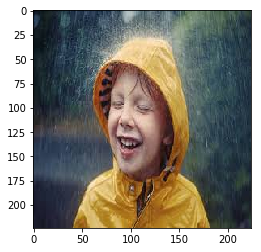

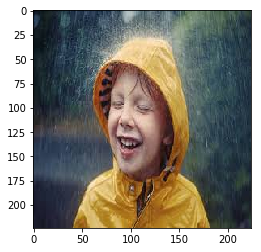

numpy array size (224, 224, 3)


In [61]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

image batch size (1, 224, 224, 3)


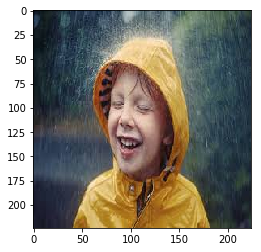

In [62]:
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [63]:
#VGG predictions
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch)
#Idk why he had added .copy in the code


In [64]:
# get the predicted probabilities for each class
predictions = vgg_conv.predict(processed_image)

In [65]:
print(predictions)

[[[[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.16914392  0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          3.7012053
     0.        ]
   [ 0.          0.          0.         ...  0.         10.938662
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ... 12.558268    0.
     0.        ]
   ...
   [24.117725    0.          0.         ...  0.          7.234207
     0.        ]
   [ 0.          0.          0.         ...  0.          0.41387898
     0.        ]
   [ 0.          0.          0.         ...  0.         11.300097
     0.        ]]

  [[ 0.          0.      

In [66]:
nVal=1
validation_features = np.zeros(shape=(nVal, 7, 7, 512))
validation_features=predictions
validation_features = np.reshape(validation_features, (nVal, 7 * 7 * 512))

In [67]:
results = model.predict_classes(validation_features)

In [68]:
print(results)

[3]


In [69]:
#Alright now have to make sense of the result returned
prob = model.predict(validation_features)
print(prob)

[[0. 0. 0. 1. 0. 0.]]


In [70]:
def id2label(results):
    if(results==0):
        emotion='anger'
    elif(results==1):
        emotion='disgust'
    elif(results==2):
        emotion='fear'
    elif(results==3):
        emotion='happy'
    elif(results==4):
        emotion='sad'
    elif(results==5):
        emotion='surprise'
    return emotion

In [71]:
print(id2label(results))

happy
